In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from analysis import visualize_decision_trees, wl_accuracy, season_record, runs_per_game, test_n
from data_format import create_data

In [2]:
version = 6
df = pd.read_csv(f'../data/baseball/training/game_data_v{version}.csv')

In [3]:
x_train_away, x_test_away, y_train_away, y_test_away = create_data(df, y_col='away_score', split_by='season')
x_train_home, x_test_home, y_train_home, y_test_home = create_data(df, y_col='home_score', split_by='season')

In [25]:
model_away = RandomForestRegressor(n_estimators=3, max_features='sqrt')
model_home = RandomForestRegressor(n_estimators=3, max_features='sqrt')

model_away.fit(x_train_away, y_train_away)
model_home.fit(x_train_home, y_train_home)

pred_away = model_away.predict(x_test_away)
pred_home = model_home.predict(x_test_home)

results = pd.DataFrame({'away_pred': pred_away, 'home_pred': pred_home, 'away_true': y_test_away, 'home_true': y_test_home})
results.describe()

print('RANDOM FOREST REGRESSION MODEL (v2 - with increased variance)')
print(f'Accuracy: {wl_accuracy(results)}%')
print('-' * 30)
season_record(df, results)
print('-' * 30)
runs_per_game(df, results)

RANDOM FOREST REGRESSION MODEL (v2 - with increased variance)
Accuracy: 52.63374485596708%
------------------------------
Season records:
ATL: 116-46	LAD: 107-55	PHI: 107-55	MIL: 105-57	TOR: 103-59	
NYY: 102-60	SEA: 101-61	MIN: 98-64	CLE: 92-70	SD: 87-75	
TB: 87-75	HOU: 86-76	SF: 84-78	MIA: 83-79	STL: 82-80	
NYM: 81-81	TEX: 79-83	CHC: 78-84	BOS: 78-84	AZ: 73-89	
BAL: 72-90	LAA: 69-93	DET: 67-95	CWS: 66-96	PIT: 59-103	
WSH: 59-103	KC: 57-105	CIN: 56-106	COL: 48-114	OAK: 48-114	
------------------------------
Runs scored per game:
ATL: 6.22 (1008)	LAD: 5.67 (919)	PHI: 5.29 (857)	HOU: 4.98 (807)	TOR: 4.91 (795)	
SEA: 4.9 (794)	MIN: 4.87 (790)	MIA: 4.87 (789)	NYY: 4.86 (787)	SD: 4.84 (784)	
TB: 4.73 (767)	CLE: 4.72 (765)	MIL: 4.65 (753)	STL: 4.62 (748)	BAL: 4.58 (743)	
WSH: 4.56 (739)	LAA: 4.56 (739)	CWS: 4.52 (733)	DET: 4.44 (720)	SF: 4.38 (710)	
KC: 4.38 (710)	NYM: 4.33 (702)	CIN: 4.32 (700)	TEX: 4.31 (699)	AZ: 4.3 (697)	
CHC: 4.27 (691)	COL: 4.23 (685)	BOS: 4.19 (679)	PIT: 4.08 (661)	OA

By using fewer decision trees, the aggregate records came out to be more realistic - even if it did come at the cost of losing some accuracy. Looking at the histogram below, we can see that this modified version has a mean accuracy of about 53%, which is still better than a random guessing model.

                0
count  500.000000
mean    52.970370
std      0.984936
min     49.917695
25%     52.345679
50%     52.983539
75%     53.631687
max     55.925926


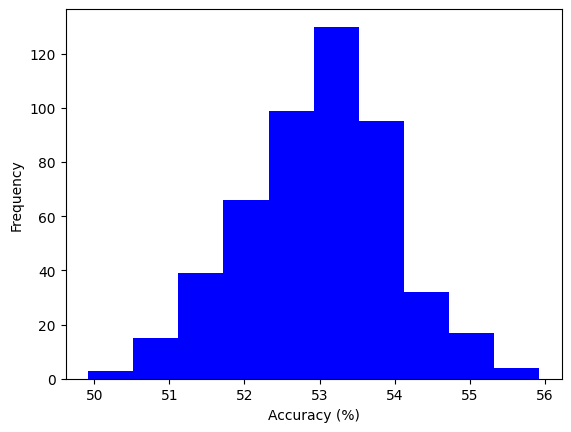

In [5]:
test_n(model_away, model_home, x_train_away, y_train_away, x_train_home, y_train_home, x_test_away, y_test_away, x_test_home, y_test_home, n_iter=500)

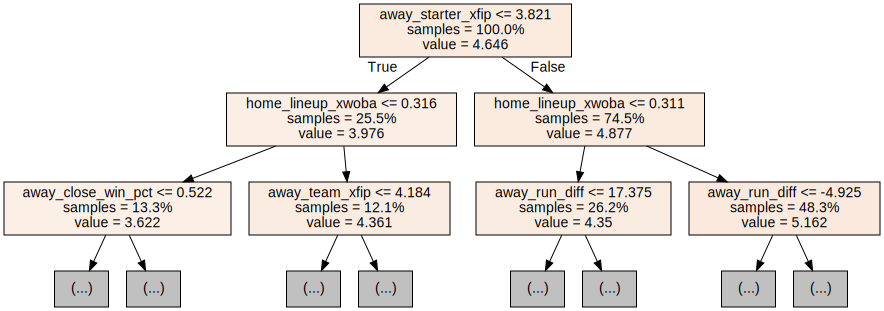

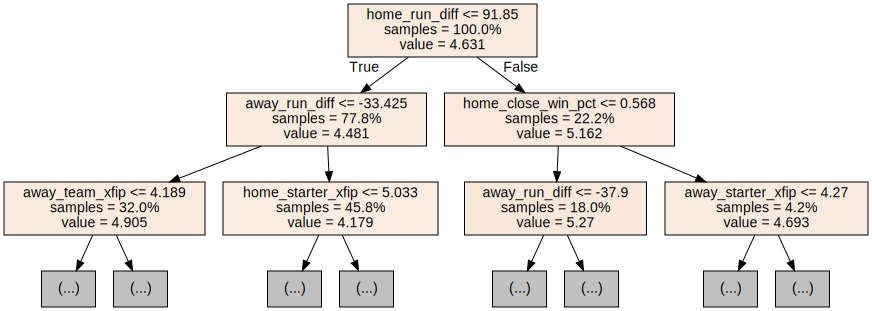

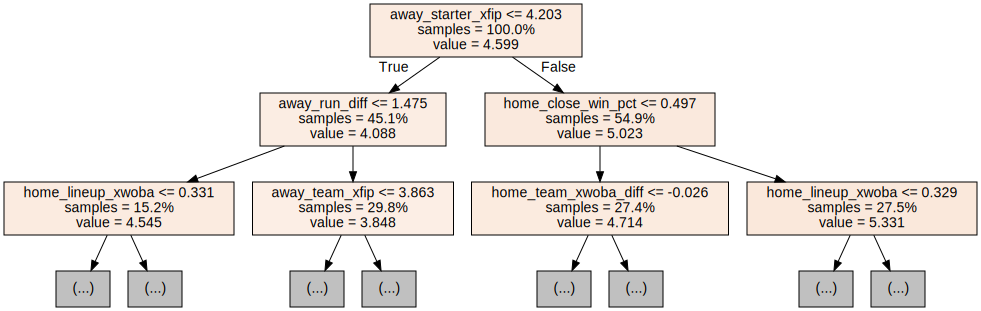

In [26]:
visualize_decision_trees(model_home, x_test_home.columns, n_trees=3)